# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Tấn Lộc
- MSSV: 22127236
- Lớp: 22CLC03

# Import

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [73]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [74]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w

    def predict(self, X):
        return X @ self.w 


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

                                   min    max       mean  median        std
Hours Studied                      1.0    9.0   4.976444     5.0   2.594647
Previous Scores                   40.0   99.0  69.396111    69.0  17.369957
Extracurricular Activities         0.0    1.0   0.493667     0.0   0.499988
Sleep Hours                        4.0    9.0   6.535556     7.0   1.695533
Sample Question Papers Practiced   0.0    9.0   4.590889     5.0   2.864570
Performance Index                 10.0  100.0  55.136333    55.0  19.187669


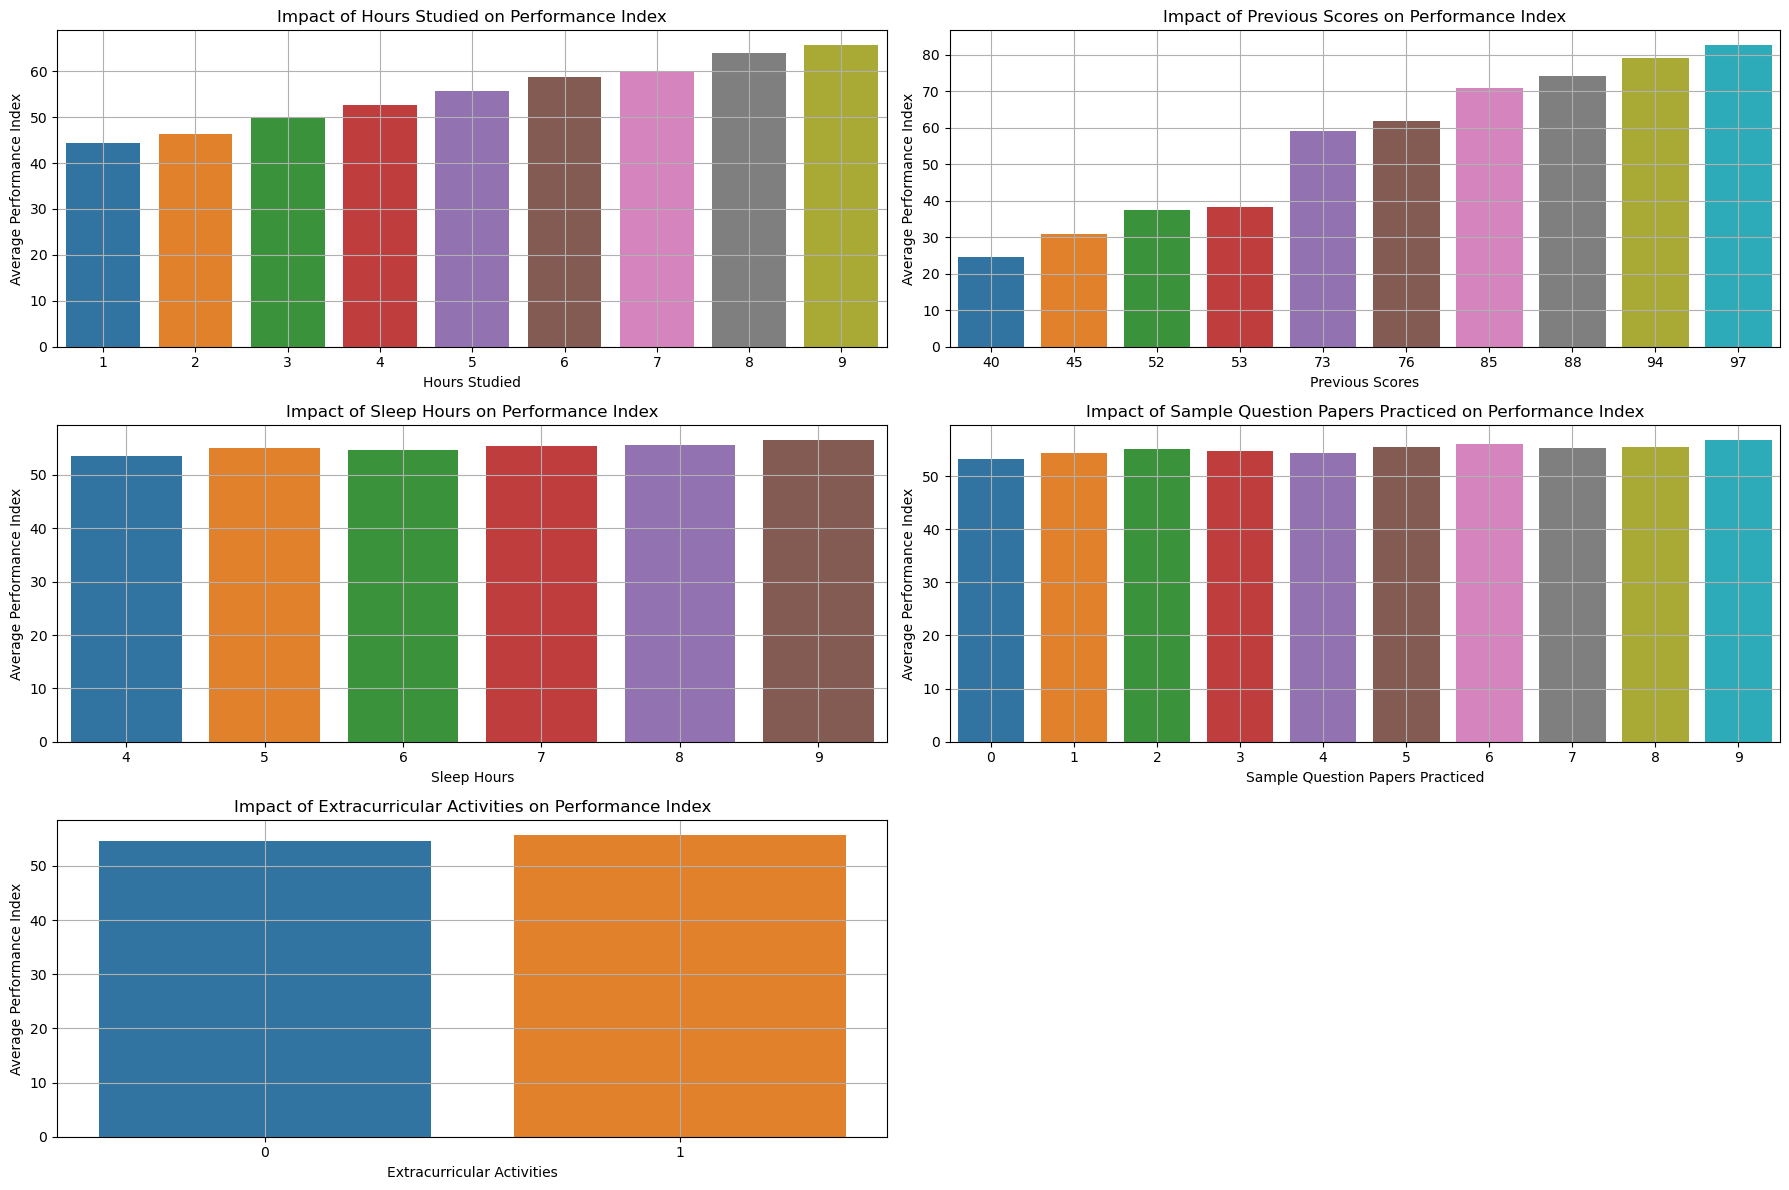

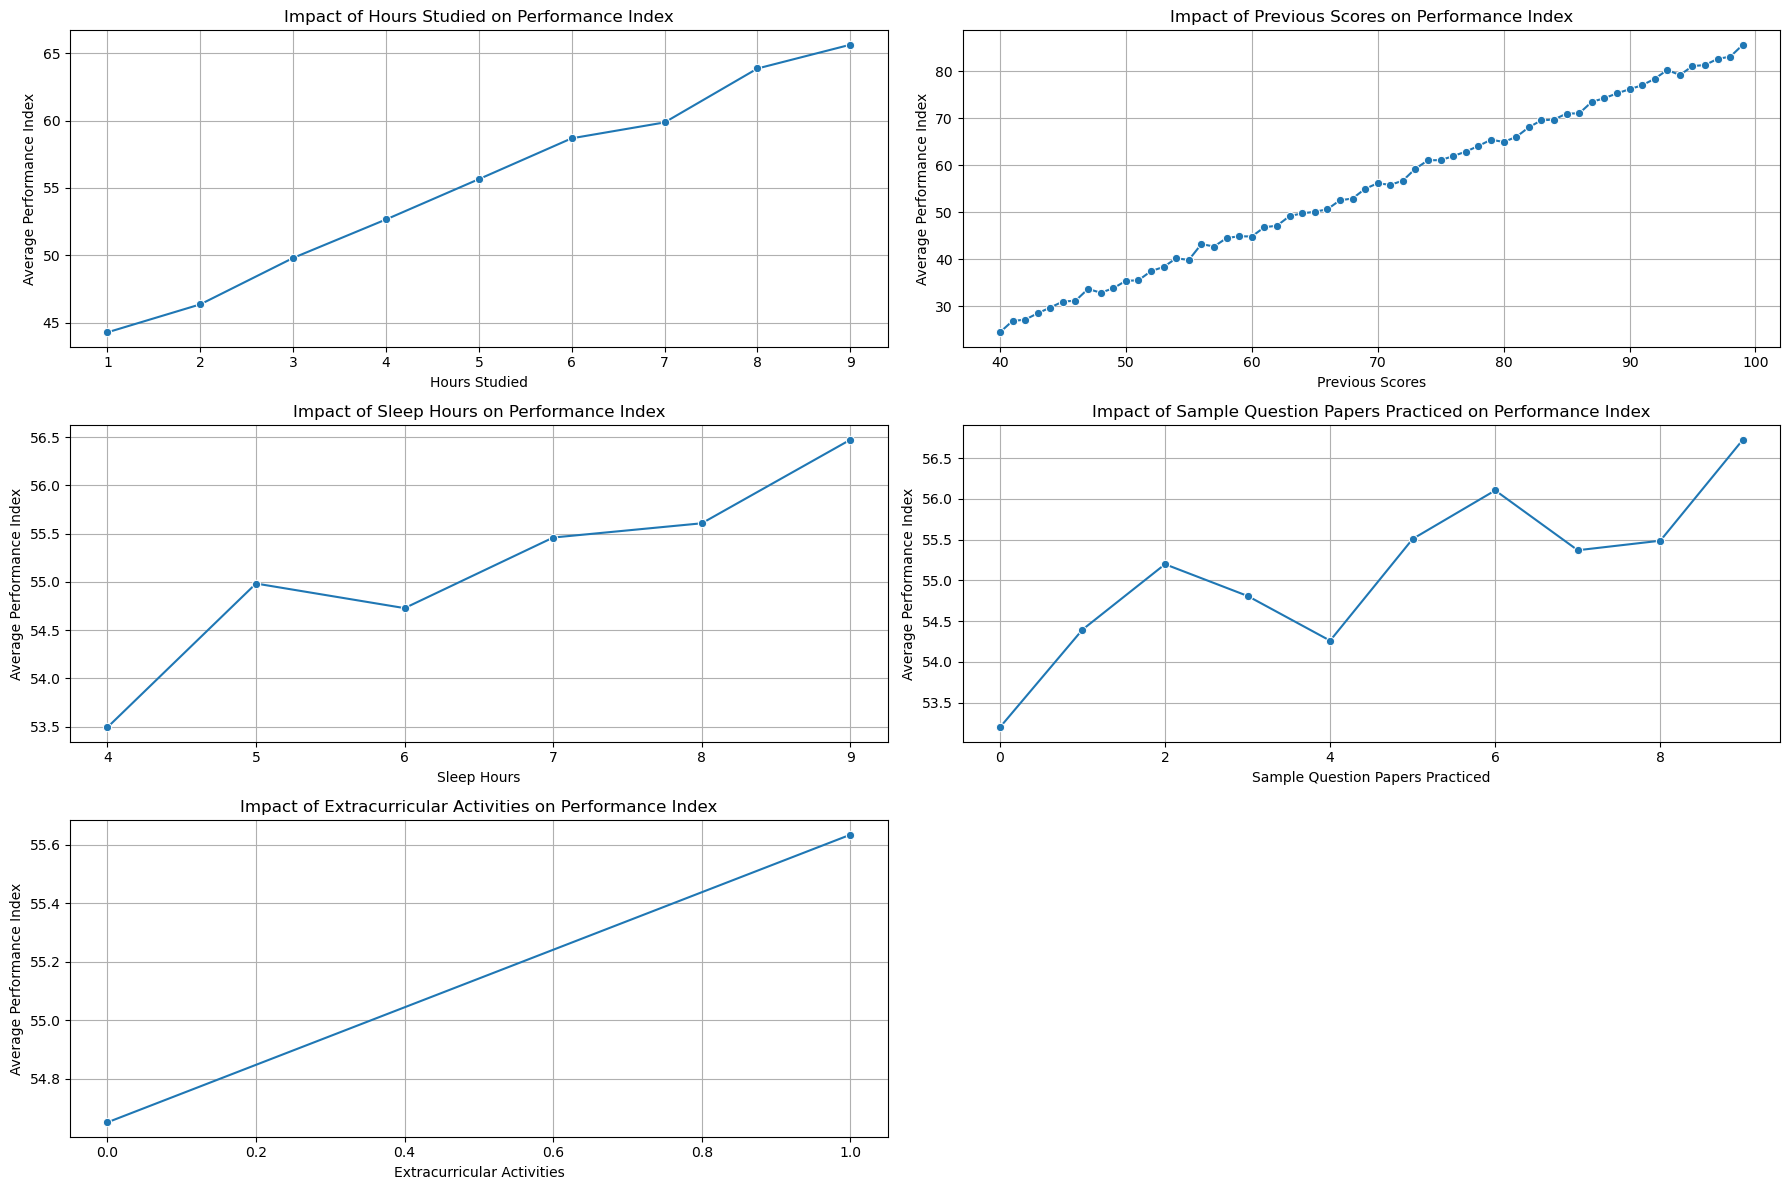

In [75]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

wr.filterwarnings('ignore')
# Tính các giá trị thống kê cơ bản
min_values = train.min()       
max_values = train.max()       
mean_values = train.mean()     
median_values = train.median() 
std_values = train.std()

# Kết hợp tất cả vào một dataframe
stats_df = pd.DataFrame({
    'min': min_values,
    'max': max_values,
    'mean': mean_values,
    'median': median_values,
    'std': std_values
})
print(stats_df)

#--------------------
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities']
# Tạo một hình để chứa tất cả các biểu đồ
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # 3 hàng x 2 cột
    # Tính giá trị trung bình của Performance Index cho từng giá trị của thuộc tính
    grouped = train.groupby(feature)['Performance Index'].mean().reset_index()
    
    # Giới hạn số lượng giá trị trên trục x xuống còn 10
    if len(grouped) > 10:
        # Chọn 10 giá trị x phổ biến nhất hoặc ngẫu nhiên
        top_10_values = grouped.sample(n=10, random_state=42)  # Chọn ngẫu nhiên 10 giá trị khác nhau
    else:
        top_10_values = grouped
    
    # Vẽ biểu đồ cột cột
    sns.barplot(x=feature, y='Performance Index', data=top_10_values)
    plt.title(f'Impact of {feature} on Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Average Performance Index')
    plt.grid(True)
    
# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()

#------------------
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # 3 hàng x 2 cột
    # Tính giá trị trung bình của Performance Index cho từng giá trị của thuộc tính
    grouped = train.groupby(feature)['Performance Index'].mean().reset_index()
    # Vẽ biểu đồ đường
    sns.lineplot(x=feature, y='Performance Index', data=grouped, marker='o')
    plt.title(f'Impact of {feature} on Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Average Performance Index')
    plt.grid(True)

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [76]:
# Phần code cho yêu cầu 2a

def preprocess(x):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    return X

# Tiền xử lý
X_train_pre = preprocess(X_train)

# Huấn luyện
lr = OLSLinearRegression().fit(X_train_pre, y_train)  

#Lấy hệ số hồi quy
params = lr.get_params()

print("Hệ số hồi quy: ")
for feature, w in zip(['Intercept', 'Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'], params):
    print(f"{feature}: {round(w, 3)}")

Hệ số hồi quy: 
Intercept: -33.969
Hours Studied: 2.852
Previous Scores: 1.018
Extracurricular Activities: 0.604
Sleep Hours: 0.474
Sample Question Papers Practiced: 0.192


In [77]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

# Dự đoán trên test
y_pred = lr.predict(preprocess(X_test))

# Tính MAE
mae(y_test, y_pred)


1.5956486884762926

Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 2.852*Hours Studied + 1.018*Previous Scores \\ + 0.604*Extracurricular Activities + 0.192*Sample Question Papers Practiced$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [78]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

def shuffle_and_split(X, Y, k):
    # Gộp dữ liệu và xáo trộn
    combined = pd.concat([X, Y], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Chia dữ liệu thành k fold
    fold_size = len(combined) // k
    folds = []
    
    for i in range(k):
        start_index = i * fold_size
        if i == k - 1:
            end_index = len(combined) # Lấy giá trị cho k - 1 fold đầu tiên
        else:
            end_index = start_index + fold_size # lấy những giá trị còn lại cho fold cuối
        
        fold = combined.iloc[start_index:end_index]
        
        # Tách lại thành x_train, y_train
        X_fold = fold.iloc[:, :-1]
        y_fold = fold.iloc[:, -1]
        
        folds.append((X_fold, y_fold))
    
    return folds

def k_fold_cross_validation_2b(X, y, k=5):
    
    folds = shuffle_and_split(X, y, k)
    mae_results = []
    
    for feature in X.columns:
        mae_list = []
        for i in range(k):
            # Tạo tập kiểm tra (test) và tập huấn luyện (train)
            X_test, y_test = folds[i]
            X_train = pd.concat([folds[j][0] for j in range(k) if j != i])
            y_train = pd.concat([folds[j][1] for j in range(k) if j != i])
            
            # Lấy dữ liệu chỉ với đặc trưng hiện tại
            X_train_feature = X_train[[feature]]
            X_test_feature = X_test[[feature]]
            
            # Tiền xử lý dữ liệu
            X_train_pre = preprocess(X_train_feature)
            X_test_pre = preprocess(X_test_feature)
            
            # Huấn luyện mô hình
            lr = OLSLinearRegression().fit(X_train_pre, y_train)
            
            # Dự đoán và tính MAE
            y_pred = lr.predict(X_test_pre)
            mae_val = mae(y_test, y_pred)
            mae_list.append(mae_val)
        
        # Tính MAE trung bình cho đặc trưng
        mean_mae = np.mean(mae_list)
        mae_results.append((feature, mean_mae))
        print(f"MAE trung bình của '{feature}': {round(mean_mae, 3)}")
    
    return mae_results

mae_results = k_fold_cross_validation_2b(X_train, y_train, k=5)
mae_df = pd.DataFrame(mae_results, columns=['Feature', 'Mean MAE'])


MAE trung bình của 'Hours Studied': 15.449
MAE trung bình của 'Previous Scores': 6.618
MAE trung bình của 'Extracurricular Activities': 16.196
MAE trung bình của 'Sleep Hours': 16.187
MAE trung bình của 'Sample Question Papers Practiced': 16.188


In [79]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Tìm thuộc tính có MAE nhỏ nhất
best_feature = mae_df.loc[mae_df['Mean MAE'].idxmin()]
best_feature_name = best_feature['Feature']
print(f"Thuộc tính có mô hình tốt nhất: {best_feature_name}")
    
# Tiền xử lý
X_train_best_feature = X_train[[best_feature_name]]
X_train_best_feature_pre = preprocess(X_train_best_feature)

# Huấn luyện trên tập huấn luyện
best_feature_model = OLSLinearRegression().fit(X_train_best_feature_pre, y_train)

params = best_feature_model.get_params()
print("Hệ số hồi quy: ")
for feature, w in zip(['Intercept', best_feature_name], params):
    print(f"{feature}: {round(w, 3)}")


Thuộc tính có mô hình tốt nhất: Previous Scores
Hệ số hồi quy: 
Intercept: -14.989
Previous Scores: 1.011


In [80]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model

# Tạo dữ liệu kiểm tra với đặc trưng tốt nhất
X_test_best_feature = X_test[[best_feature_name]]
X_test_best_feature_pre = preprocess(X_test_best_feature)

# Dự đoán với mô hình đã huấn luyện
y_pred = best_feature_model.predict(X_test_best_feature_pre)

# Tính MAE trên tập kiểm tra
test_mae = mae(y_test, y_pred)
print(f"MAE trên tập kiểm tra với mô hình tốt nhất: {round(test_mae, 3)}")

MAE trên tập kiểm tra với mô hình tốt nhất: 6.544


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14,989 + 1.011*Previous Scores$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

- Mô hình 1: Hồi quy bội với tương tác HS và SH
    - Ý tưởng: Trong thực tế, số giờ học và số giờ ngủ là hai yếu tố có thể có mối quan hệ phức tạp ảnh hưởng đến hiệu suất học tập của học sinh thành tích tổng thể của sinh viên.
    
- Mô hình 2: Hồi quy phi tuyến bậc 2 đặc trưng PS HS
    - Ý tưởng: sử dụng hồi quy tuyến tính bậc 2 cho cả 2 đặc trưng ảnh hưởng lớn nhất đến Performance Index là PS và HS đã được rút ra ở câu 1
- Mô hình 3: Hồi quy bậc 3 đặc trưng PS
    - Ý tưởng: thử dùng hồi quy bậc 3 để nắm những sự biến đổi phi tuyến phức tạp hơn của đặc trưng tốt nhất để dự báo Performance Idex là PS đã thấy ở câu 2b

In [81]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

'''
Mô hình 1: Hồi quy bội với tương tác đặc trưng
Performance Index = w0 + w1*HS + w2*SH + w3*HS*SH 
'''

# Hàm tiền xử lý
def preprocess_model1(x):
    HS = x['Hours Studied'].values
    SH = x['Sleep Hours'].values
    
    # Tạo đặc trưng tương tác giữa HS và SH
    interaction = HS * SH
    
    # Tạo ma trận thiết kế với hệ số chặn, HS, SH và tương tác giữa HS và SH
    X_with_intercept = np.column_stack((
        np.ones(len(HS)),  # Hệ số chặn
        HS,
        SH,
        interaction
    ))
    
    return X_with_intercept

# Triển khai mô hình hồi quy bội với tương tác đặc trưng
def model1_fit(X_train, y_train):
    X_train_selected = X_train[['Hours Studied', 'Sleep Hours']]
    X_train_pre = preprocess_model1(X_train_selected)
    lr = OLSLinearRegression().fit(X_train_pre, y_train)
    return lr


'''
Mô hình 2: Hồi quy phi tuyến bậc 2
Performance Index = w0 + w1*PS + w2*HS + w3*PS^2 + w4*HS^2
'''
# Hàm tiền xử lý cho hồi quy bậc 2
def preprocess_model2(x):
    PS = x['Previous Scores'].values
    HS = x['Hours Studied'].values
    
    # Tạo các đặc trưng bậc 2
    PS_squared = PS ** 2
    HS_squared = HS ** 2
    
    # Tạo ma trận thiết kế với hệ số chặn, PS, HS, PS^2 và HS^2
    X_with_intercept = np.column_stack((
        np.ones(len(PS)),  # Hệ số chặn
        PS,
        HS,
        PS_squared,
        HS_squared
    ))
    
    return X_with_intercept

# Triển khai mô hình hồi quy bậc 2
def model2_fit(X_train, y_train):
    X_train_selected = X_train[['Previous Scores', 'Hours Studied']]
    X_train_pre = preprocess_model2(X_train_selected)
    lr = OLSLinearRegression().fit(X_train_pre, y_train)
    return lr


''' 
Mô hình 3: Hồi quy phi tuyến bậc 3
Performance Index = w0 + w1*PS + w2*PS^2 + w3*PS^3
'''

# Hàm tiền xử lý cho hồi quy bậc 3
def preprocess_model3(x):
    PS = x['Previous Scores'].values
    
    # Tạo đặc trưng bậc 2 và bậc 3 cho PS
    PS_squared = PS ** 2
    PS_cubed = PS ** 3
    
    # Tạo ma trận thiết kế với hệ số chặn, PS, PS^2, và PS^3
    X_with_intercept = np.column_stack((
        np.ones(len(PS)),  # Hệ số chặn
        PS,
        PS_squared,
        PS_cubed
    ))
    
    return X_with_intercept

# Triển khai mô hình hồi quy bậc 3
def model3_fit(X_train, y_train):
    X_train_selected = X_train[['Previous Scores']]
    X_train_pre = preprocess_model3(X_train_selected)
    lr = OLSLinearRegression().fit(X_train_pre, y_train)
    return lr



## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [82]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

def k_fold_cross_validation_2c(X, y, models, k=5):
    folds = shuffle_and_split(X, y, k)
    results = {}
    
    for model_name, model_func in models.items():
        mae_results = []
        
        for i in range(k):
            # Tạo tập kiểm tra (test) và tập huấn luyện (train)
            X_test, y_test = folds[i]
            X_train = pd.concat([folds[j][0] for j in range(k) if j != i])
            y_train = pd.concat([folds[j][1] for j in range(k) if j != i])
            
            # Huấn luyện mô hình
            lr = model_func(X_train, y_train)
            
            # Tiền xử lý dữ liệu kiểm tra
            X_test_pre = preprocess_model1(X_test) if model_name == 'interaction' \
                else preprocess_model2(X_test) if model_name == '2nd_degree' \
                else preprocess_model3(X_test)
            
            # Dự đoán và tính MAE
            y_pred = lr.predict(X_test_pre)
            mae_val = mae(y_test, y_pred)
            mae_results.append(mae_val)
        
        mean_mae = np.mean(mae_results)
        results[model_name] = mean_mae
        print(f"MAE trung bình của mô hình {model_name}: {round(mean_mae, 5)}")
    
    return results

# Tạo danh sách tên mô hình
models = {
    'interaction': model1_fit,
    '2nd_degree': model2_fit,
    '3rd_degree': model3_fit
}

results = k_fold_cross_validation_2c(X_train, y_train, models)
best_model_name = min(results, key=results.get)  # Mô hình có MAE trung bình thấp nhất
print(f"Mô hình tốt nhất là: {best_model_name}")


MAE trung bình của mô hình interaction: 15.43849
MAE trung bình của mô hình 2nd_degree: 1.81575
MAE trung bình của mô hình 3rd_degree: 6.61906
Mô hình tốt nhất là: 2nd_degree


In [83]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

def train_best_model(X_train, y_train, best_model_func):
    """Huấn luyện lại mô hình tốt nhất trên toàn bộ tập huấn luyện."""
    # Tiền xử lý dữ liệu huấn luyện
    if best_model_func == model1_fit:
        X_train_pre = preprocess_model1(X_train)
    elif best_model_func == model2_fit:
        X_train_pre = preprocess_model2(X_train)
    elif best_model_func == model3_fit:
        X_train_pre = preprocess_model3(X_train)
    
    # Huấn luyện mô hình
    model = OLSLinearRegression().fit(X_train_pre, y_train)
    return model

# Lấy hàm mô hình tốt nhất
best_model_func = models[best_model_name]

# Huấn luyện lại mô hình tốt nhất trên toàn bộ tập huấn luyện
my_best_model = train_best_model(X_train, y_train, best_model_func)

# In ra các hệ số của mô hình tốt nhất
params = my_best_model.get_params()
print(f"Các hệ số của mô hình tốt nhất {best_model_name}:")
for x in params:
    print(round(x, 5), end='  ')
print()

Các hệ số của mô hình tốt nhất 2nd_degree:
-29.76745  1.02257  2.79133  -3e-05  0.00647  


In [84]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

# Tiền xử lý dữ liệu kiểm tra với mô hình tốt nhất
if best_model_func == model1_fit:
    X_test_pre = preprocess_model1(X_test)
elif best_model_func == model2_fit:
    X_test_pre = preprocess_model2(X_test)
elif best_model_func == model3_fit:
    X_test_pre = preprocess_model3(X_test)

# Dự đoán giá trị trên tập kiểm tra
y_pred = my_best_model.predict(X_test_pre)

# Tính MAE trên tập kiểm tra
test_mae = mae(y_test, y_pred)
print(f"MAE trên tập kiểm tra với mô hình tốt nhất {best_model_name}: {round(test_mae, 3)}")


MAE trên tập kiểm tra với mô hình tốt nhất 2nd_degree: 1.838


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -29.767 + 1.023*Previous Scores + 2.791*Hours Studied - 0.00003*Previous Scores^2 + 0.006*Hours Studied^2$$